# Heart Attack Classification

## Fatemeh Zahedi 

## Introduction
Heart attack is one of the leading causes of human death worldwide. Almost 610000 people die out of heart attack everyday in the United States alone. However, there are well understood early symptoms of heart attack that could be used to greatly help in saving life of many people and minimize damages by detecting and reporting at an early stage.<br>
There are various risk factors that may have contributed to the heart attack, spanning everything from lifestyle to medical condition and demographics.<br>
I used the data set from Kaggle for heart attack. This dataset includes many kinds of risk factor including lifestyle, medical condition and demographics. The goal of this project is to classify the heart attack to high chance and low chance of heart attack based on the span of different risk factors (features) in this dataset. In other words, my goal is to create a model that will be able to successfully classify a sample into high chance of heart attack or low chance of heart attack by the different risk factors of that sample.<br>
### Data description

age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable ~1 = more chance of heart attack, 0 = less chance of heart attack

sat - % of o2saturation

This dataset has 303 different samples. The number of features (risk factors) have been considered is 14.


In [1]:
#initial tools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#plotting tools
%matplotlib inline
#show plots directly
import matplotlib.pyplot as plt # plotting in details
import seaborn as sns # to ease complex plots

import warnings 
warnings.filterwarnings("ignore") # ignore file warnings 

In [2]:
df = pd.read_csv("G:\My Drive\Courses\Machine learning-statistical learning\Project\Heart attack data\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#reading an existing feature
df["sat"] = pd.read_csv("G:\My Drive\Courses\Machine learning-statistical learning\Project\Heart attack data\o2Saturation.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,sat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [5]:
X = df.drop(["output"],axis=1) #independant columns
y = df.output #dependant column

In [7]:
print(X.shape)
print(y.shape)

(303, 14)
(303,)


In [8]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


This table shows the number of unique values for each feature

Separating the columns in categorical and continuous:

In [11]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak","sat"]
target_col = ["output"]

In [12]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
sat,303.0,97.480858,0.346740,96.5,97.5,97.5,97.5,98.6


## Visualization of Data
Firstly, we start visualization of the data to better understand about different features, how related to each other and separate them to categorical and continuous features to be able to more efficiently use them.
### Count plot of categorical features

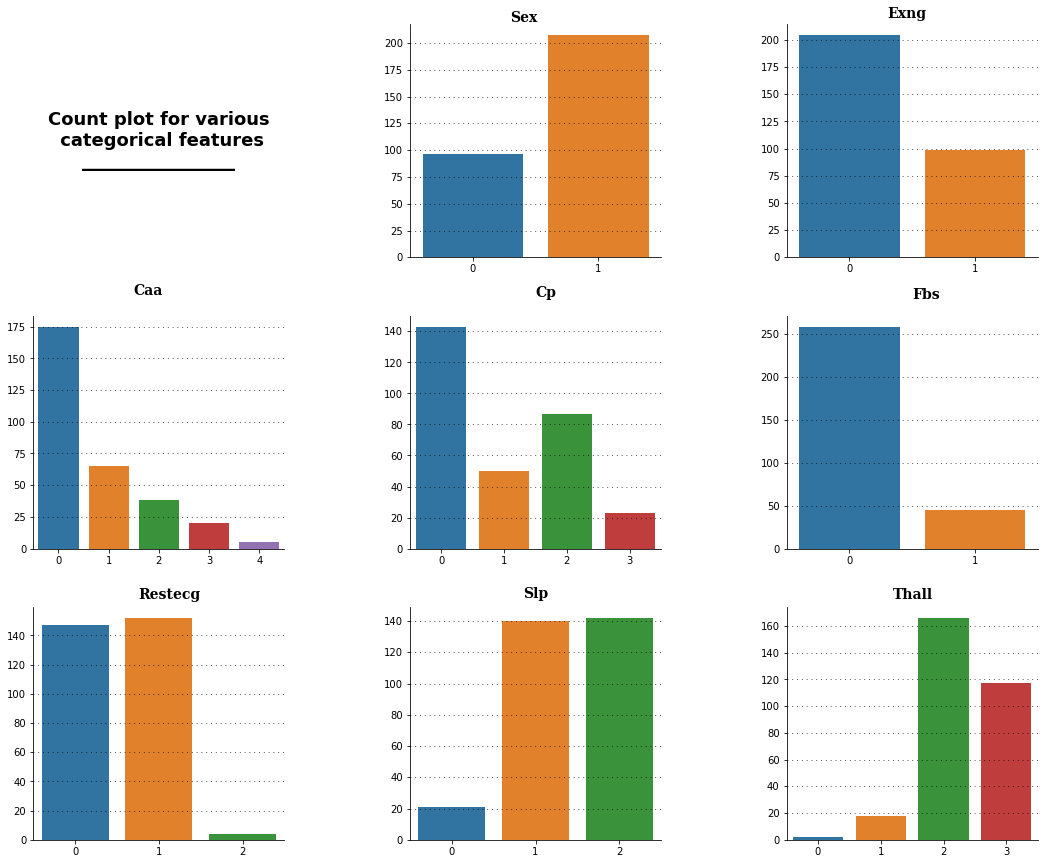

In [23]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])


# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='sans-serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex')
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng')
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa')
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp')
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg')
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp')
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall')
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

### Boxen plot of countinuous features

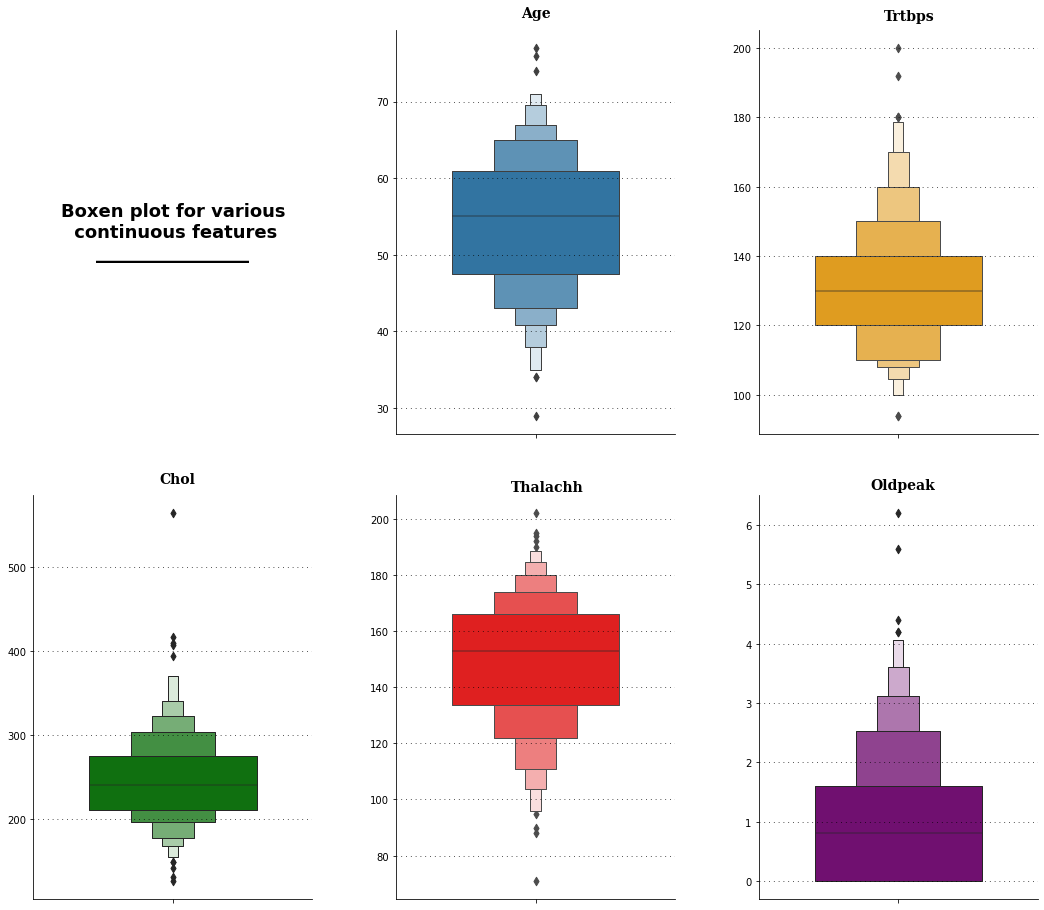

In [29]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='san-serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],color='orange',width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],color='green',width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'], color='red',width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],color='purple',width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

### Count plot of target

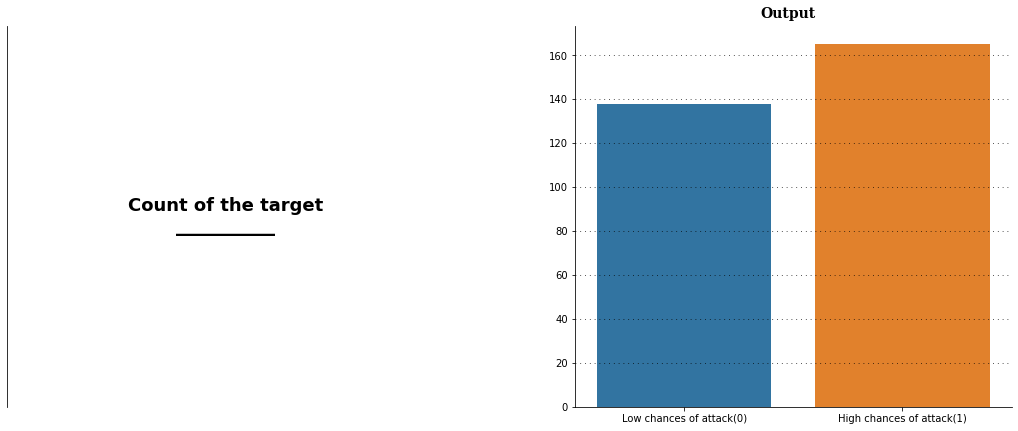

In [31]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='san-serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

### Correlation matrix of continuous features

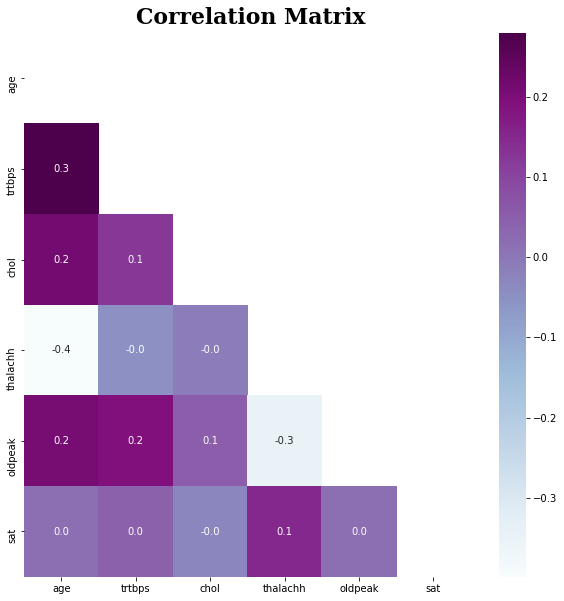

In [38]:
# Correlation Matrix
df_corr = df[con_cols].corr().transpose()
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='BuPu')
plt.show()

## Machine Learning Methods
We applied 6 different methods to the train/test data and show the performance of each methods regarding the accuracy and ROC curves. These method that are employed are Logistic Regression, Gaussian Naive Bayes, Decision Trees, Random Forest, K Nearest Neighbours and Boosting. To improve the accuracy and performance of some of these methods, I employed optimization tuning and variable selection. Finally, the results of these methods have been compared.

In [128]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
import math
import random
from sklearn.model_selection import StratifiedKFold

I converted categorical features using dummies and use some scaler on all data.

In [43]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak","sat"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sat,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1.1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1.1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1.1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,0.6,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0.0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 23)
The shape of X_test is        (61, 23)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


### Logistic Regression

In [173]:
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_predicted=logreg_model.predict(X_test)
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_predicted)*100, "%")


The test accuracy score of Logistric Regression is  91.80327868852459 %


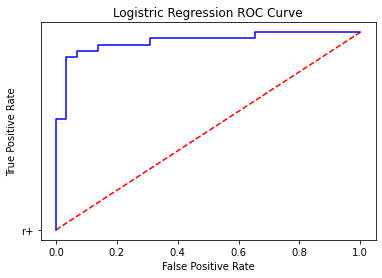

In [174]:
y_predicted_prob = logreg_model.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_predicted_prob)

# plotting the curve
plt.plot([0,1],[0,1],'r--','r+')
plt.plot(fpr,tpr,label='Logistic Regression',color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

### Gaussian Naive Bayes

In [175]:
# Gaussian Naive Bayes
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
  
y_predicted = GNB_model.predict(X_test)
print("The test accuracy score of Gaussian Naive Bayes is ", accuracy_score(y_test, y_predicted)*100, "%")

The test accuracy score of Gaussian Naive Bayes is  65.57377049180327 %


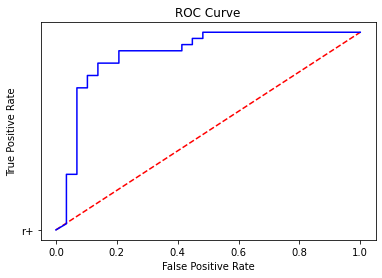

In [176]:
y_predicted_prob = GNB_model.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_predicted_prob)

# plotting the curve
plt.plot([0,1],[0,1],'r--','r+')
plt.plot(fpr,tpr,color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Decision Tree

In [177]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt_model.fit(X_train, y_train)

# calculating the predictions
y_predicted = dt_model.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_predicted)*100, "%")

The test accuracy score of Decision Tree is  77.04918032786885 %


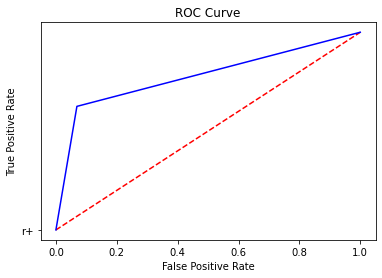

In [178]:
y_predicted_prob = dt_model.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_predicted_prob)

# plotting the curve
plt.plot([0,1],[0,1],'r--','r+')
plt.plot(fpr,tpr,color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Random Forest

In [179]:
#Random Forest

# instantiating the object
rf_model = RandomForestClassifier()

# fitting the model
rf_model.fit(X_train, y_train)

# calculating the predictions
y_predicted = rf_model.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_predicted)*100, "%")

The test accuracy score of Random Forest is  86.88524590163934 %


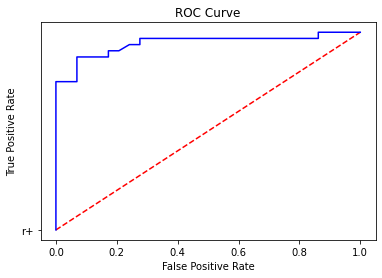

In [180]:
y_predicted_prob = rf_model.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_predicted_prob)

# plotting the curve
plt.plot([0,1],[0,1],'r--','r+')
plt.plot(fpr,tpr,color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### K Nearest Neighbours

In [181]:
# K Nearest Neighbours

KNN_model = KNeighborsClassifier(n_neighbors = 1)  

# fitting the model
KNN_model.fit(X_train, y_train)

# calculating the predictions
y_predicted = KNN_model.predict(X_test)

print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of KNN is :  90.1639344262295 %


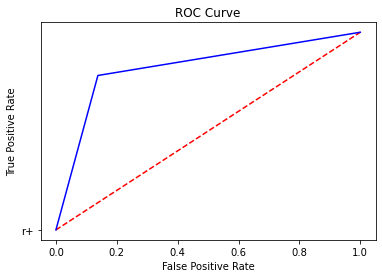

In [182]:
y_predicted_prob = KNN_model.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_predicted_prob)

# plotting the curve
plt.plot([0,1],[0,1],'r--','r+')
plt.plot(fpr,tpr,color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Text(0, 0.5, 'Error')

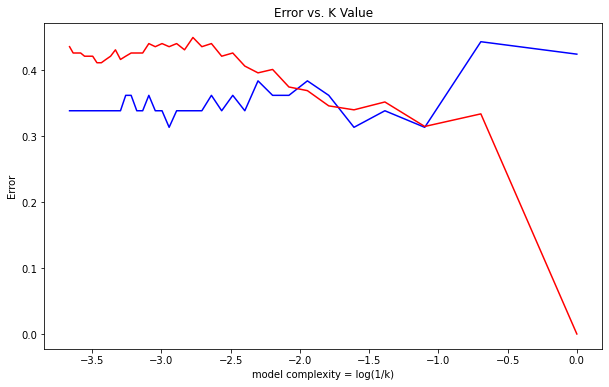

In [112]:
error = []
errortrain = []
mcmp = []
  
for i in range(1, 40):
      
    KNN_model = KNeighborsClassifier(n_neighbors = i)
    KNN_model.fit(X_train, y_train)
    pred_i = KNN_model.predict(X_test)
    pred_itrain = KNN_model.predict(X_train)
    error.append(math.sqrt(mean_squared_error(y_test,pred_i)))
    errortrain.append(math.sqrt(mean_squared_error(y_train,pred_itrain)))
    mcmp.append(np.log(1/i)) #model complexity
    #error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(mcmp, error, color ='blue')
plt.plot(mcmp, errortrain, color ='red')
  
plt.title('Error vs. K Value')
plt.xlabel('model complexity = log(1/k)')
plt.ylabel('Error')

After variable tuning, the accuracy decreased a little bit, but the ROC curve clearly improved.

In [183]:
KNN_model = KNeighborsClassifier(n_neighbors = 3)
  
KNN_model.fit(X_train, y_train)
predicted = KNN_model.predict(X_test)
  
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of KNN is :  90.1639344262295 %


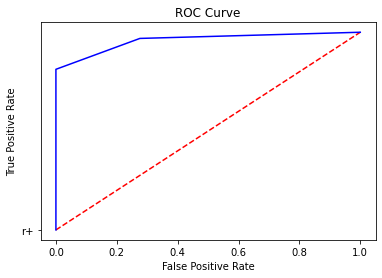

In [184]:
y_predicted_prob = KNN_model.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_predicted_prob)

# plotting the curve
plt.plot([0,1],[0,1],'r--','r+')
plt.plot(fpr,tpr,color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Gradient Boosting

In [185]:
# Gradient Boosting Classifier without tuning
gbt_model = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt_model.fit(X_train,y_train)

# predicting values
y_predicted = gbt_model.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_predicted)*100, "%")


The test accuracy score of Gradient Boosting Classifier is  90.1639344262295 %


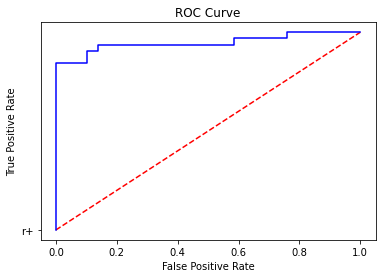

In [186]:
y_predicted_prob = gbt_model.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_predicted_prob)

# plotting the curve
plt.plot([0,1],[0,1],'r--','r+')
plt.plot(fpr,tpr,label='Boosting without tuning',color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [157]:
# Gradient Boosting Classifier with parameter selection Grid search
from sklearn import metrics
random.seed(42)
n_trees = np.array([100, 300, 400, 800])  # grid search parameters
subsample = np.array([.7, .8, .9])
depth = np.array([1, 4])
feature = np.array([0.2, 0.5, 0.7])
params = np.array(np.meshgrid(n_trees, subsample, depth, feature)).reshape(4,-1).T
# 5-fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True) # 5-fold
for p in params:
  boost_mod = GradientBoostingClassifier(n_estimators=int(p[0]), max_depth=int(p[2]), subsample=p[1],max_features=p[3])  # create boosting model
  error = []
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # train-test split
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    boost_mod.fit(X_train, y_train)    # fit on train
    y_pred = boost_mod.predict(X_test)  # predict on test
    error.append(metrics.accuracy_score(y_test, y_pred))   # model accuracy
  print(sum(error)/len(error), p)  # average accuracy

0.8345901639344262 [100.    0.7   1.    0.2]
0.8350819672131149 [100.    0.7   1.    0.5]
0.8249726775956285 [100.    0.7   1.    0.7]
0.8153005464480876 [100.    0.7   4.    0.2]
0.835191256830601 [100.    0.7   4.    0.5]
0.8152459016393442 [100.    0.7   4.    0.7]
0.8578688524590163 [3.e+02 7.e-01 1.e+00 2.e-01]
0.8318032786885248 [300.    0.7   1.    0.5]
0.8416393442622951 [300.    0.7   1.    0.7]
0.8280327868852458 [3.e+02 7.e-01 4.e+00 2.e-01]
0.8153005464480876 [300.    0.7   4.    0.5]
0.8349726775956284 [300.    0.7   4.    0.7]
0.8512021857923496 [4.e+02 7.e-01 1.e+00 2.e-01]
0.8445901639344262 [400.    0.7   1.    0.5]
0.8385245901639344 [400.    0.7   1.    0.7]
0.8480874316939889 [4.e+02 7.e-01 4.e+00 2.e-01]
0.8119672131147541 [400.    0.7   4.    0.5]
0.8150273224043716 [400.    0.7   4.    0.7]
0.8350819672131147 [8.e+02 7.e-01 1.e+00 2.e-01]
0.8314207650273223 [8.e+02 7.e-01 1.e+00 5.e-01]
0.8053005464480876 [8.e+02 7.e-01 1.e+00 7.e-01]
0.8350273224043715 [8.e+02 7

Based on grid search and 5 fold, the best parameters are n_estimators = 400, max_depth=1, subsample=0.8, max_features=0.5. We can see improvement in the ROC curve too with these new parameters.

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 42)
# Gradient Boosting Classifier with parameter selection Grid search
gbt_model = GradientBoostingClassifier(n_estimators = 400,max_depth=1,subsample=0.8,max_features=0.5,random_state=42)

# fitting the model
gbt_model.fit(X_train,y_train)

# predicting values
y_predicted = gbt_model.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_predicted)*100, "%")

The test accuracy score of Gradient Boosting Classifier is  90.1639344262295 %


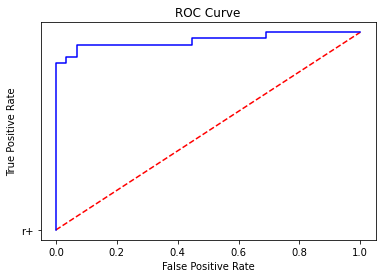

In [170]:
y_predicted_prob = gbt_model.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_predicted_prob)

# plotting the curve
plt.plot([0,1],[0,1],'r--','r+')
plt.plot(fpr,tpr,label='Boosting with parameter selection',color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

## Summary of result


In [204]:
# Results Summary
print("Model: \t\t\t\t\t", "Accuracy:")
print("Logistic Regression\t\t\t91.8%")
print("Gaussian Naive Bayes\t\t\t65.57%")
print("Decision Tree\t\t\t\t77.05%")
print("Random Forest\t\t\t\t86.88%")
print("K Nearest Neighbours\t\t\t90.16%")
print("Gradient Boosting\t\t\t90.16%")

Model: 					 Accuracy:
Logistic Regression			91.8%
Gaussian Naive Bayes			65.57%
Decision Tree				77.05%
Random Forest				86.88%
K Nearest Neighbours			90.16%
Gradient Boosting			90.16%


Based on the combination of results of accuracy and ROC curve, the Gradient Boosting with variable tuning provide the best model.

## Conclusion

The purpose of this study was to identify appropriate methods which can predic with reasonable accuracy how high or low is the chance of heart attack in a person with some knowledge about lifestyle, medical condition and demographics of that person. Several well-known machine learning method including Logistic Regression, Gaussian Naive Bayes, Decision Tree, Random Forest, K Nearest Neighbours and Gradient Boosting have been employed and compared to find an appropriate one for the datasets. Parameter selection have been implemented in some of these method to improve the accuracy and the model. While I get good accuracy and ROC curve in many of the employed methods, I think there might be still more improvement in employing deep learning or such algorithm as future direction. 